In [1]:
!pip install -q roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 97.3 MB/s eta 0:00:00


In [5]:
!nvidia-smi

Wed Oct 15 16:33:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
from roboflow import Roboflow
from google.colab import userdata

api_key = userdata.get('Roboflow')
rf = Roboflow(api_key=api_key)
project = rf.workspace("aboubakr-tahir-qzdqb").project("rock-paper-scissors-sxsw-84uth")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rock-paper-scissors-1 in yolov8:: 100%|██████████| 15054/15054 [00:02<00:00, 5434.56it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
from ultralytics import YOLO

# 1. Load a pretrained YOLOv8 model
# 'yolov8n.pt' is the smallest and fastest version.
model = YOLO('yolov8n.pt')

results = model.train(
   data='/content/rock-paper-scissors-1/data.yaml', # Path to your data.yaml
   epochs=50,                                      # How many times to go through the data
   imgsz=640,                                      # Image size (must match preprocessing)
   project='/content/drive/MyDrive/my_first_yolo_project',                # It will create this folder
   name='rps_training_run_1'                       # It will create a subfolder with this name
)

Ultralytics 8.3.214 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/rock-paper-scissors-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=0, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=rps_training_run_13, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv

RuntimeError: Dataset '/content/rock-paper-scissors-1/data.yaml' error ❌ '/content/rock-paper-scissors-1/data.yaml' does not exist

In [4]:
from ultralytics import YOLO

# Load your BEST trained model
model = YOLO('/content/drive/MyDrive/my_first_yolo_project/rps_training_run_12/weights/best.pt')

# Evaluate its performance on the test set
metrics = model.val() # It will find the test set from your data.yaml

Ultralytics 8.3.214 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1234.0±403.2 MB/s, size: 48.9 KB)
val: Scanning /content/rock-paper-scissors-1/valid/labels... 604 images, 251 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 604/604 1.8Kit/s 0.3s
val: New cache created: /content/rock-paper-scissors-1/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 38/38 0.2it/s 3:13
                   all        604        418      0.973      0.927      0.962      0.786
                 Paper        139        146      0.978      0.926      0.958      0.786
                  Rock        128        150      0.958      0.953      0.959      0.773
              Scissors        118        122      0.983      0.902      0.969        0.8
Speed: 7.1ms preprocess, 306.3ms inference, 0.0ms lo

In [5]:
metrics = model.val(split='test')

Ultralytics 8.3.214 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 836.7±107.8 MB/s, size: 37.7 KB)
val: Scanning /content/rock-paper-scissors-1/test/labels... 329 images, 134 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 329/329 1.8Kit/s 0.2s
val: New cache created: /content/rock-paper-scissors-1/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 0.2it/s 1:52
                   all        329        217      0.942       0.92      0.954      0.785
                 Paper         73         73      0.925      0.863      0.917      0.713
                  Rock         66         75      0.945      0.933      0.961      0.801
              Scissors         67         69      0.957      0.963      0.983      0.843
Speed: 7.3ms preprocess, 326.9ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to /content/runs/detect/val2


Displaying 3 random images from the test set with their predictions:

image 1/1 /content/rock-paper-scissors-1/test/images/Screen-Recording-2023-03-11-at-9_48_18-PM_mov-113_jpg.rf.6a8815a6e1b4d8b5f7ae4e5668644f7c.jpg: 640x640 (no detections), 223.5ms
Speed: 2.6ms preprocess, 223.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

--- Predictions for Screen-Recording-2023-03-11-at-9_48_18-PM_mov-113_jpg.rf.6a8815a6e1b4d8b5f7ae4e5668644f7c.jpg ---


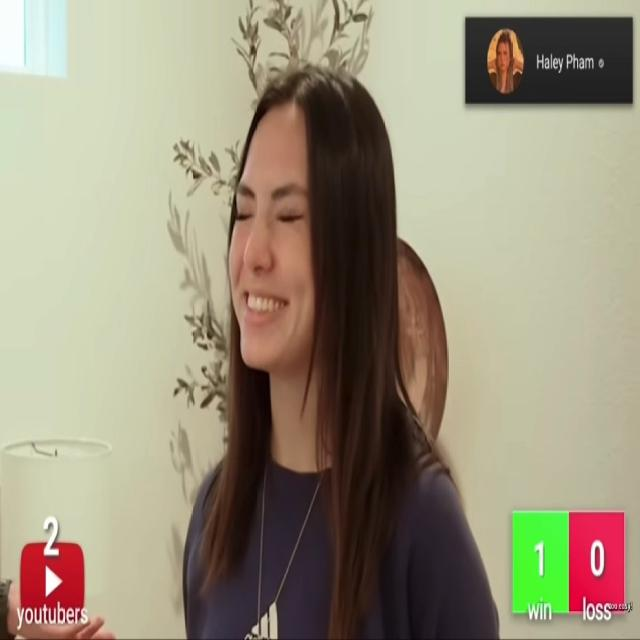


image 1/1 /content/rock-paper-scissors-1/test/images/zoom_tests_RockPaperScissors-mohamed_mp4-3_jpg.rf.ca77f58233505a8c74057ec075731aa2.jpg: 640x640 (no detections), 234.5ms
Speed: 3.4ms preprocess, 234.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

--- Predictions for zoom_tests_RockPaperScissors-mohamed_mp4-3_jpg.rf.ca77f58233505a8c74057ec075731aa2.jpg ---


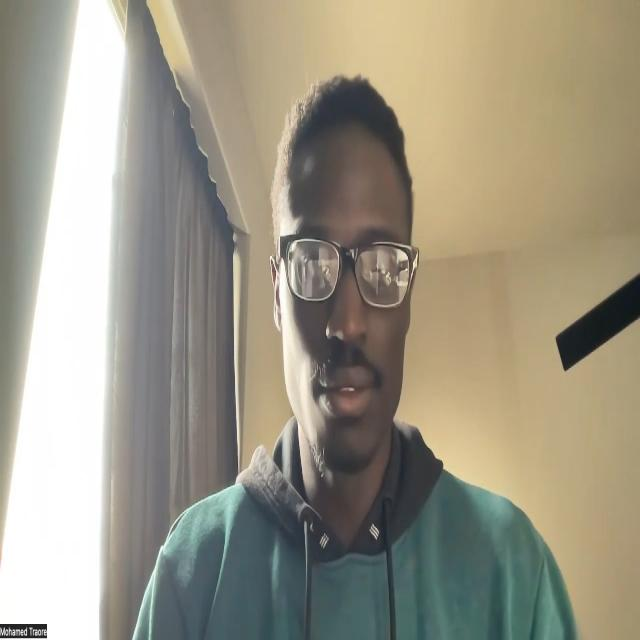


image 1/1 /content/rock-paper-scissors-1/test/images/JENGA_COURTYARD_S_T_frame_0229_jpg.rf.dd61b8f3e9a225f2d907621a64d7a906.jpg: 640x640 (no detections), 237.0ms
Speed: 3.6ms preprocess, 237.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

--- Predictions for JENGA_COURTYARD_S_T_frame_0229_jpg.rf.dd61b8f3e9a225f2d907621a64d7a906.jpg ---


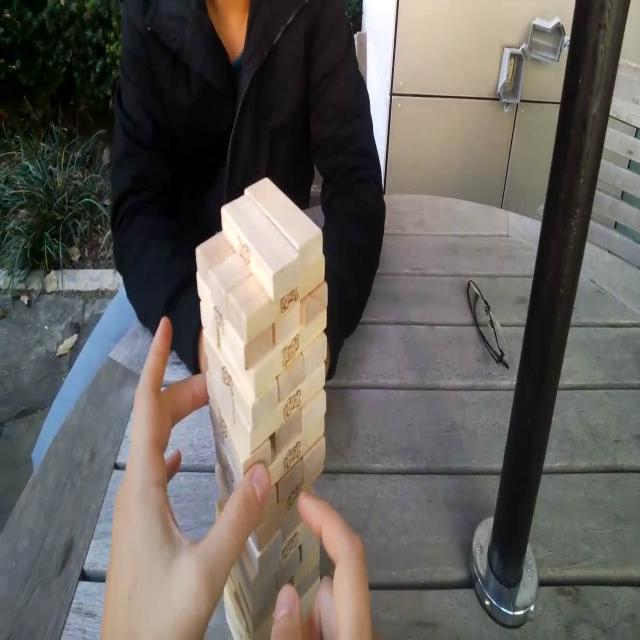


image 1/1 /content/rock-paper-scissors-1/test/images/Cool-Video-of-Ocean-Fish-Swimming_mp4-4_jpg.rf.fee93ca4f4b6946b2af6dccded038151.jpg: 640x640 (no detections), 320.8ms
Speed: 3.7ms preprocess, 320.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

--- Predictions for Cool-Video-of-Ocean-Fish-Swimming_mp4-4_jpg.rf.fee93ca4f4b6946b2af6dccded038151.jpg ---


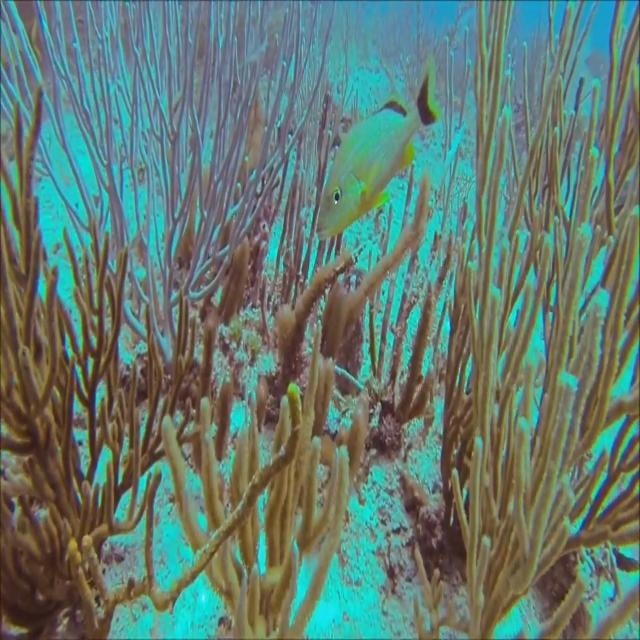


image 1/1 /content/rock-paper-scissors-1/test/images/egohands-public-1624465898166_png_jpg.rf.74d8f8baa1294f52166f1d607b731c1e.jpg: 640x640 (no detections), 405.4ms
Speed: 5.4ms preprocess, 405.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

--- Predictions for egohands-public-1624465898166_png_jpg.rf.74d8f8baa1294f52166f1d607b731c1e.jpg ---


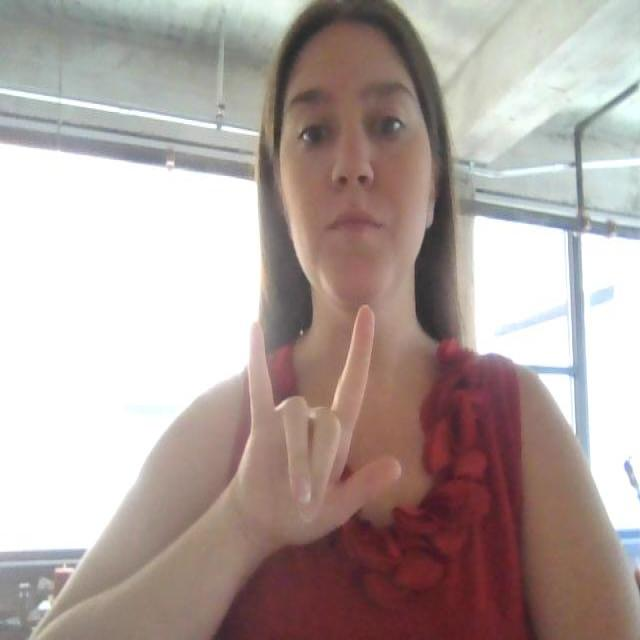


image 1/1 /content/rock-paper-scissors-1/test/images/youtube-50_jpg.rf.9eeaba7745fb75f9c44ed36fd3bab1f4.jpg: 640x640 (no detections), 330.9ms
Speed: 3.2ms preprocess, 330.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

--- Predictions for youtube-50_jpg.rf.9eeaba7745fb75f9c44ed36fd3bab1f4.jpg ---


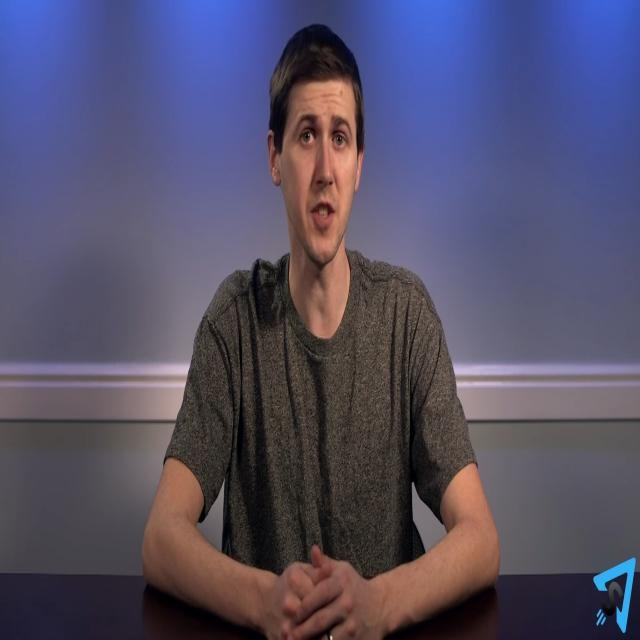


image 1/1 /content/rock-paper-scissors-1/test/images/610x_jpg.rf.a6e7dda42bd64d12ceaa2cba452fdc1e.jpg: 640x640 (no detections), 354.1ms
Speed: 5.3ms preprocess, 354.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

--- Predictions for 610x_jpg.rf.a6e7dda42bd64d12ceaa2cba452fdc1e.jpg ---


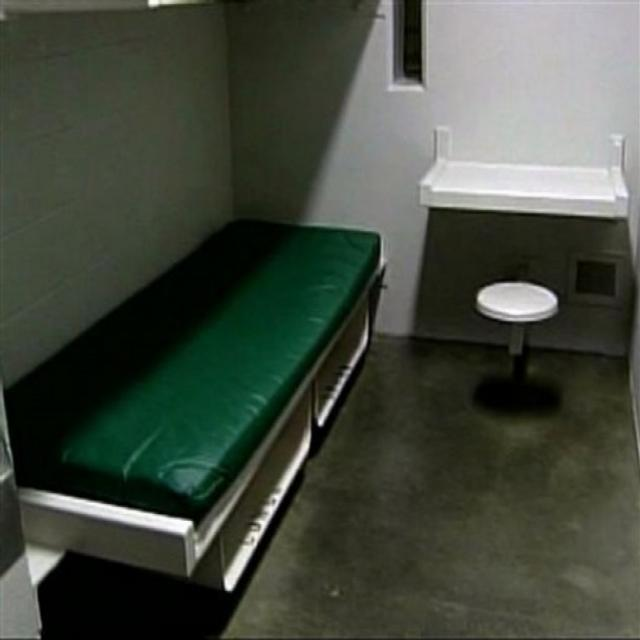


image 1/1 /content/rock-paper-scissors-1/test/images/zoom_tests_RockPaperScissors-mohamed_mp4-254_jpg.rf.96c365046deeb0658be8e12bb66365d5.jpg: 640x640 (no detections), 337.0ms
Speed: 4.3ms preprocess, 337.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

--- Predictions for zoom_tests_RockPaperScissors-mohamed_mp4-254_jpg.rf.96c365046deeb0658be8e12bb66365d5.jpg ---


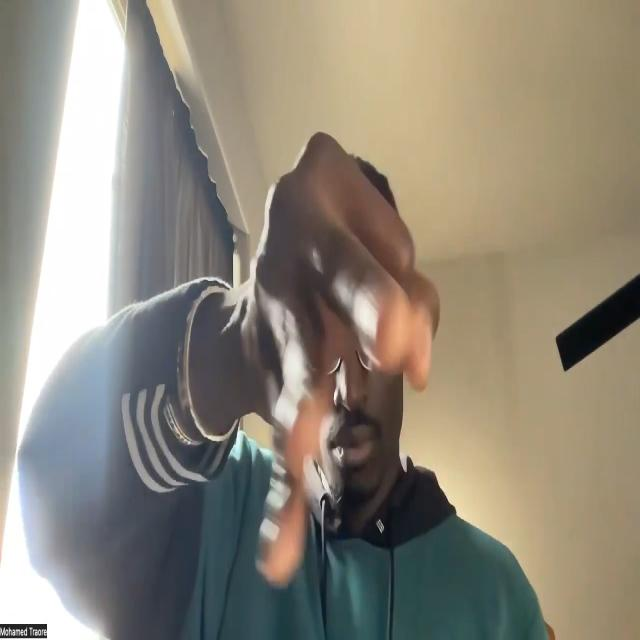


image 1/1 /content/rock-paper-scissors-1/test/images/egohands-public-1626966060817_png_jpg.rf.3aee3ff708806d608bb0a7e7055b80bb.jpg: 640x640 (no detections), 329.2ms
Speed: 4.3ms preprocess, 329.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

--- Predictions for egohands-public-1626966060817_png_jpg.rf.3aee3ff708806d608bb0a7e7055b80bb.jpg ---


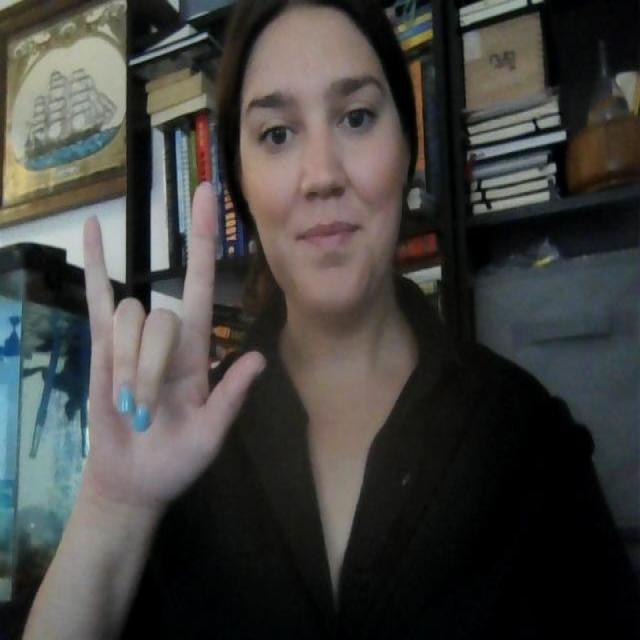


image 1/1 /content/rock-paper-scissors-1/test/images/Screen-Recording-2023-03-11-at-9_48_18-PM_mov-94_jpg.rf.84f0abeedae0bf03c28ea27986321514.jpg: 640x640 (no detections), 381.5ms
Speed: 3.4ms preprocess, 381.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

--- Predictions for Screen-Recording-2023-03-11-at-9_48_18-PM_mov-94_jpg.rf.84f0abeedae0bf03c28ea27986321514.jpg ---


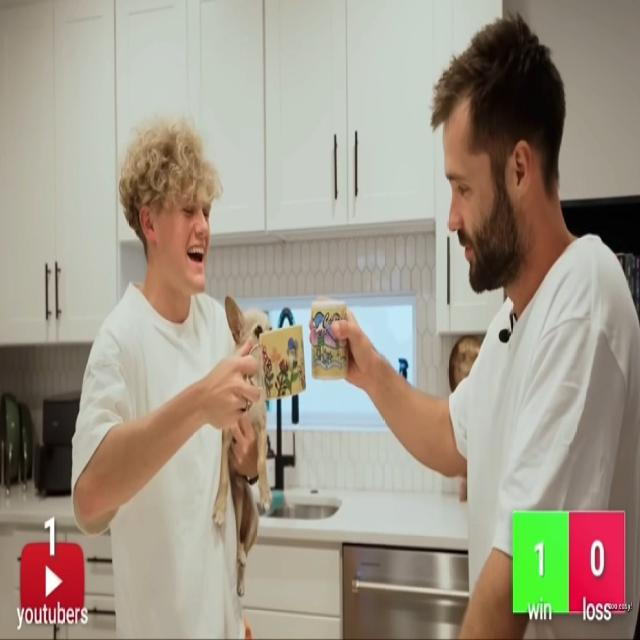

In [17]:
import os
import random
from ultralytics import YOLO
from PIL import Image

# 1. Load your best trained model
model = YOLO('/content/drive/MyDrive/my_first_yolo_project/rps_training_run_12/weights/best.pt')

# 2. Define the path to your test images folder
test_images_dir = '/content/rock-paper-scissors-1/test/images/'

# 3. Get a list of all image files in the folder
image_files = os.listdir(test_images_dir)

# 4. Select a few random images from the list (e.g., 3 images)
random_images = random.sample(image_files, 10)

print("Displaying 3 random images from the test set with their predictions:")

# 5. Loop through the random images, make predictions, and show them
for image_file in random_images:
    # Construct the full image path
    image_path = os.path.join(test_images_dir, image_file)

    # Run prediction on the image
    results = model(image_path)

    # Show the results (this will display the image with boxes and labels)
    for r in results:
        print(f"\n--- Predictions for {image_file} ---")
        r.show()